In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['labels','data']

In [6]:
labels = {'ham':0,'spam':1}
df['bin_labels'] = df['labels'].map(labels)
Y = df['bin_labels'].values
df.head()

,labels,data,bin_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [8]:
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [10]:
model.fit(Xtrain,Ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [11]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.985266541655505
test score: 0.9744426318651441


In [12]:
#MultinomialNB分類
model_nb = MultinomialNB()
model_nb.fit(Xtrain, Ytrain)
print("train score:", model_nb.score(Xtrain, Ytrain))
print("test score:", model_nb.score(Xtest, Ytest))

train score: 0.9713367264934369
test score: 0.953779227841218


In [13]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

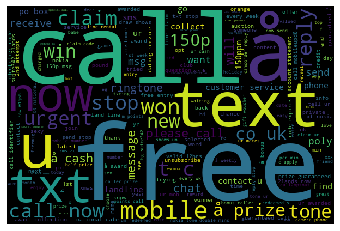

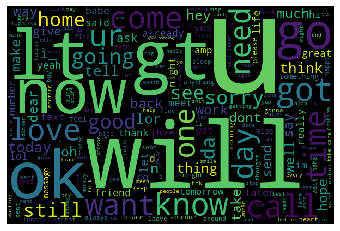

In [14]:
visualize('spam')
visualize('ham')

In [15]:
#找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

In [16]:
# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['bin_labels'] == 1)]['data']
error_msg = []
for msg in sneaky_spam:
    error_msg.append(msg)
error_msg

["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+',
 'Did you hear about the new \\Divorce Barbie\\"? It comes with all of Ken\'s stuff!"',
 "You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again",
 'BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu',
 'SMS. ac Blind Date 4U!: Rodds1 is 21/m from Aberdeen, United Kingdom. Check Him out http://img. sms. ac/W/icmb3cktz8r7!-4 no Blind Dates send HIDE',
 'You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750',
 'XCLUSIVE@

In [17]:
# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['bin_labels'] == 0)]['data']
not_act_msg=[]
for msg in not_actually_spam:
    not_act_msg.append(msg)
not_act_msg

["Yes:)from last week itself i'm taking live call.",
 'Hi hope u get this txt~journey hasnt been gd,now about 50 mins late I think.',
 'Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..',
 'Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..',
 "And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed",
 'Hey i booked the kb on sat already... what other lessons are we going for ah? Keep your sat night free we need to meet and confirm our lodging ',
 'Yun ah.the ubi one say if Ì_ wan call by tomorrow.call 67441233 look for irene.ere only got bus8,22,65,61,66,382. Ubi cres,ubi tech park.6ph for 1st 5wkg days.Ì¬n',
 'Dear,regret i cudnt pick call.drove down frm ctla now at cochin home.left mobile in car..ente style ishtamayoo?happy bakrid!',
 'Your opinion abou